# Framing the Problem
The goal of this report is to build three univariate linear regression models to predict the median house value based on three independent variables: median income, population, and number of households. We will evaluate the goodness-of-fit for each model and compare their performance.


# getting the data

 Downloaded from Kaggle [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [19]:
# imports needed for this lab
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Load the dataset using pandas and display the first few rows to check if the dataset us loaded

In [20]:
# Load the dataset using pandas
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis (EDA)
## 1. Explore statistics (e.g. using Pandas `describe` function) 

the relevant columns for this analysis are

In [21]:
# Summary statistics
df[['median_income', 'population', 'households', 'median_house_value']].describe()

,median_income,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,1425.476744,499.539680,206855.816909
std,1.899822,1132.462122,382.329753,115395.615874
min,0.499900,3.000000,1.000000,14999.000000
25%,2.563400,787.000000,280.000000,119600.000000
50%,3.534800,1166.000000,409.000000,179700.000000
75%,4.743250,1725.000000,605.000000,264725.000000
max,15.000100,35682.000000,6082.000000,500001.000000


# Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next

first scatter plot between Median House Value vs Median Income

Text(0.5, 1.0, 'Median House Value vs. Median Income')

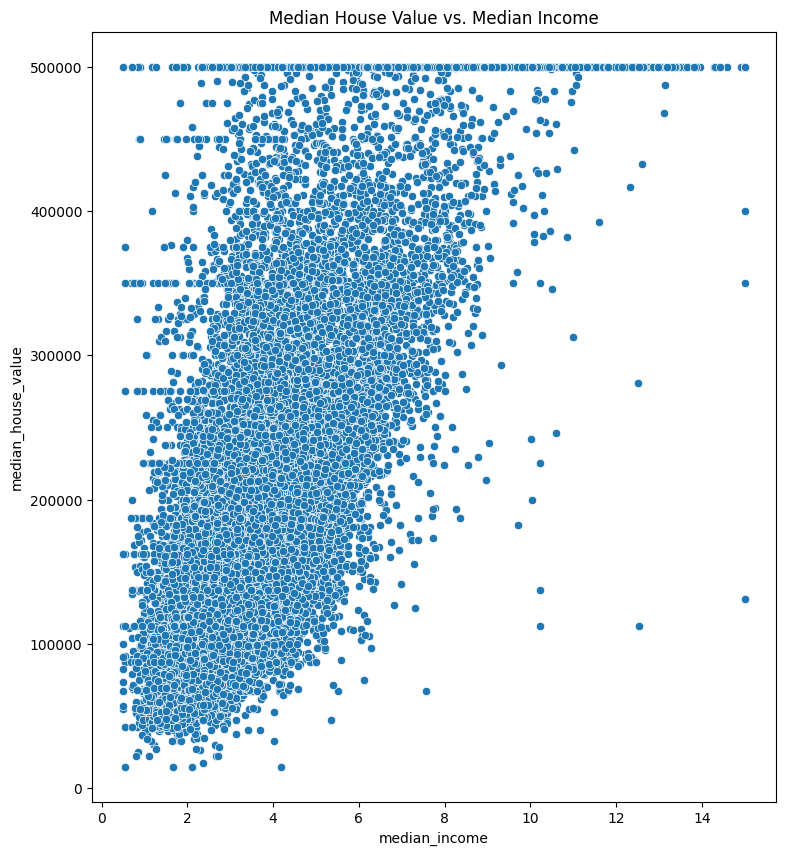

In [22]:
# Scatter plots
plt.figure(figsize=(30, 10))

# Median House Value vs Median Income
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Median House Value vs. Median Income')

second scatter plot Median House Value vs Population

Text(0.5, 1.0, 'Median House Value vs. Population')

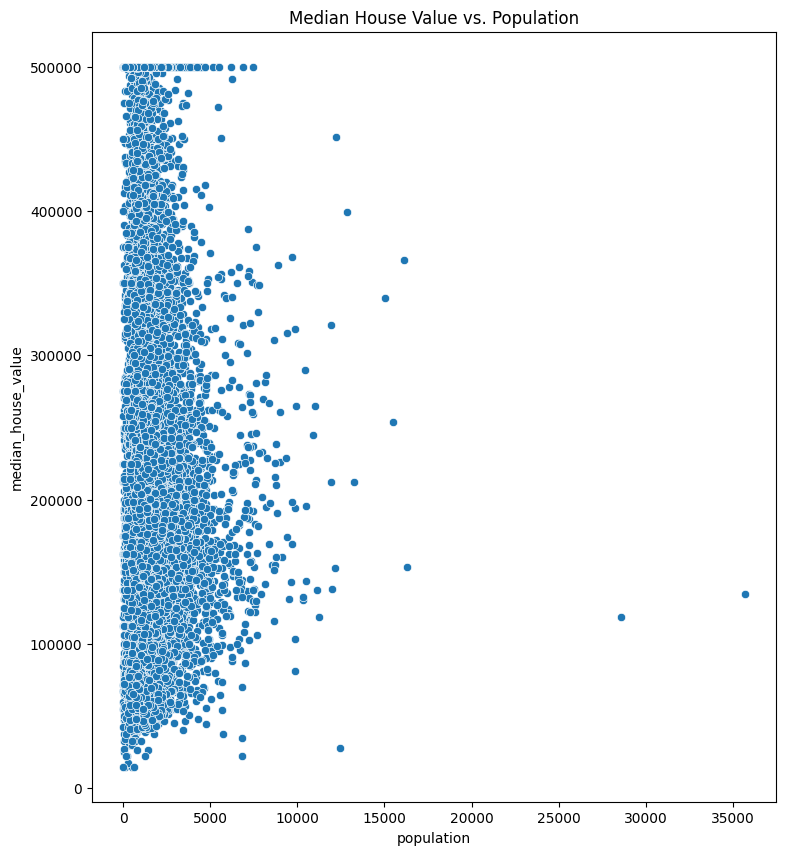

In [23]:
plt.figure(figsize=(30, 10))
# Median House Value vs Population
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['population'], y=df['median_house_value'])
plt.title('Median House Value vs. Population')

third scatter plot Median House Value vs Number of Households

Text(0.5, 1.0, 'Median House Value vs. Number of Households')

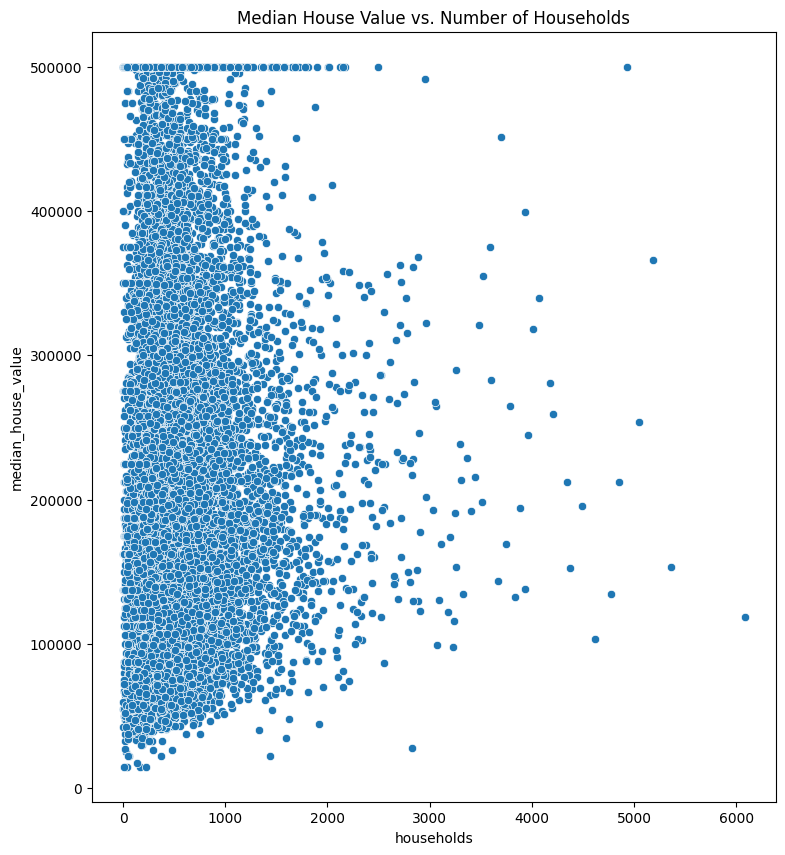

In [24]:
plt.figure(figsize=(30, 10))
# Median House Value vs Number of Households
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['households'], y=df['median_house_value'])
plt.title('Median House Value vs. Number of Households')

# Run three linear regressions (fitting) between:
median house value vs. median income
median house value vs. population
median house value vs. number of households.

define the variables

In [27]:
# Independent variables
X_income = df[['median_income']]
X_population = df[['population']]
X_households = df[['households']]

# Dependent variable
y = df['median_house_value']

initialize the model

In [28]:
# Initialize the model
lr = LinearRegression()

running the model

In [29]:
# Fit models
models = {}
for name, X in zip(['Income', 'Population', 'Households'], [X_income, X_population, X_households]):
    lr.fit(X, y)
    intercept = lr.intercept_
    slope = lr.coef_[0]
    y_pred = lr.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    models[name] = {'Intercept': intercept, 'Slope': slope, 'MSE': mse, 'MAE': mae}

results table

In [30]:
# Create a results table
results_df = pd.DataFrame(models).T
print(results_df)

                Intercept         Slope           MSE           MAE
Income       45085.576703  41793.849202  7.011312e+09  62625.933791
Population  210436.262076     -2.511753  1.330741e+10  91153.820095
Households  196928.577162     19.872775  1.325778e+10  90802.743243


# Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly)

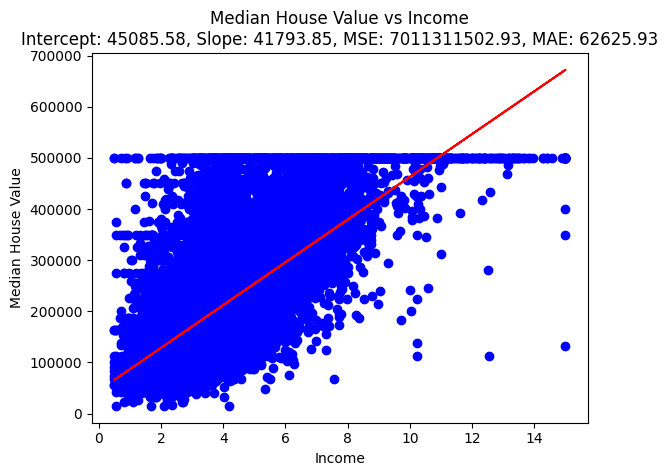

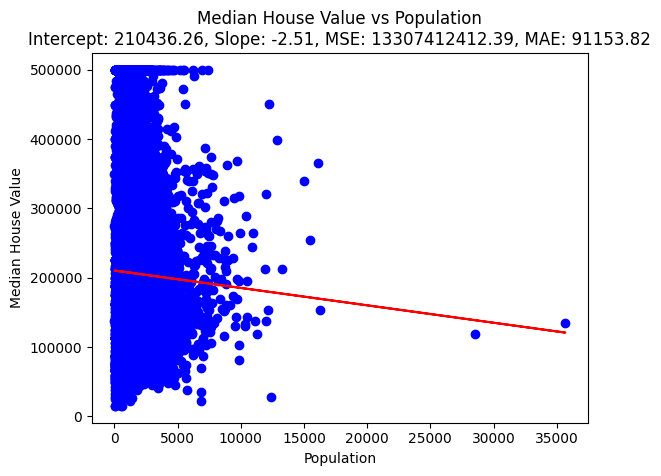

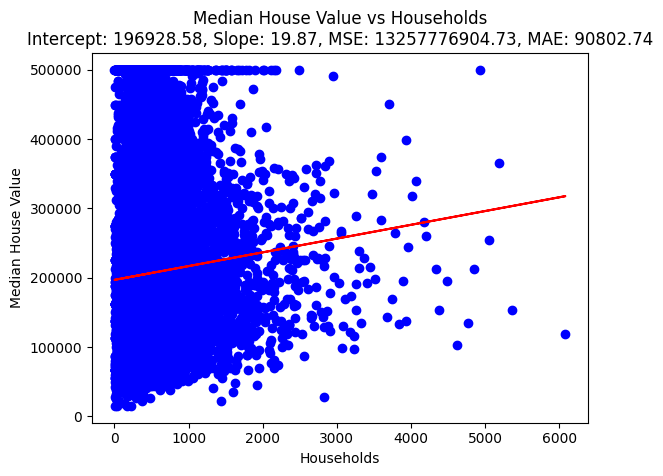

In [31]:
# Plot scatter with regression lines
def plot_regression(x, y, intercept, slope, mse, mae, title):
    plt.scatter(x, y, color='blue')
    plt.plot(x, intercept + slope * x, color='red')
    plt.title(f'{title}\nIntercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.xlabel(title.split(' vs ')[1])
    plt.ylabel('Median House Value')
    plt.show()

# Plot each regression
for name, X in zip(['Income', 'Population', 'Households'], [X_income, X_population, X_households]):
    plot_regression(X.values, y.values, models[name]['Intercept'], models[name]['Slope'], models[name]['MSE'], models[name]['MAE'], f'Median House Value vs {name}')


# Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed